En el pair programming de hoy usaremos el set de datos que guardastéis en el pair programming de normalización y estandarización.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
from scipy import stats

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [3]:
df = pd.read_pickle("datos/peliculas_limpio.pkl")
df.head(2)

,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,No_of_Votes,Gross,Rating_BOX,Ryr_Sklstd,Rnt_Sklstd,Meta_Sklstd,Votes_Sklstd,Gross_Sklstd
0,1994.0,A,142,Drama,9.3,80.0,2343110.0,28341469.0,0.100485,-0.151515,0.676471,-0.001712,6.918768,0.131429
1,1972.0,A,175,Crime,9.2,100.0,1620367.0,134966411.0,0.100485,-0.818182,1.647059,1.426860,4.650520,1.997227


Vuestro set de datos debería tener al menos una variable categórica, el objetivo del pair programming de hoy:
-Hacer una códificación de la/las variables categóricas que tengáis en vuestro set de datos.
-Recordad que lo primero que deberéis hacer es decidir su vuestras variables tienen o no orden, para que en función de esto uséis una aproximación u otra.
-Guardad el dataframe, donde deberíais tener las variables estadandarizas, normalizadas y codificadas en un csv para usarlo en el próximo pairprogramming

In [4]:
from sklearn.preprocessing import LabelEncoder

<p> Vamos a transformar el certificado en un valor numérico ya que la columna certificado es categórica ordinal y necesitamos convertirla en numérica para el modelo de predicción.</p>

In [5]:
# Vamos a darle un valor númerico a la variable categórica "Certificate"
le = LabelEncoder()
df['Certificate_le']=le.fit_transform(df['Certificate'])
#Deberíamos haber utilizado el one-hot encoder o el get-dummies si no tenía orden y haber comprobado gráficamente el orden de las categorías

In [6]:
df.head(5)

,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,No_of_Votes,Gross,Rating_BOX,Ryr_Sklstd,Rnt_Sklstd,Meta_Sklstd,Votes_Sklstd,Gross_Sklstd,Certificate_le
0,1994.0,A,142,Drama,9.3,80.0,2343110.0,28341469.0,0.100485,-0.151515,0.676471,-0.001712,6.918768,0.131429,1
1,1972.0,A,175,Crime,9.2,100.0,1620367.0,134966411.0,0.100485,-0.818182,1.647059,1.426860,4.650520,1.997227,1
2,2008.0,UA,152,Action,9.0,84.0,2303232.0,534858444.0,0.100485,0.272727,0.970588,0.284003,6.793615,8.994820,14
3,1974.0,A,202,Crime,9.0,90.0,1129952.0,57300000.0,0.100485,-0.757576,2.441176,0.712574,3.111408,0.638166,1
4,1957.0,U,96,Crime,9.0,96.0,689845.0,4360000.0,0.100485,-1.272727,-0.676471,1.141145,1.730182,-0.288216,12


<p> Vamos a hacer un encoding de la columna género. Como no estamos seguros de si tiene orden o no sacamos los valores únicos y realizamos un boxplot para comprobar visualmente la posición de las medianas y ver si tiene orden para crear categorías numéricas.</p>

In [7]:
df['Genre'].unique()

array(['Drama', 'Crime', 'Action', 'Biography', 'Western', 'Comedy',
       'Adventure', 'Animation', 'Horror', 'Mystery', 'Film-Noir',
       'Fantasy', 'Family', 'Thriller'], dtype=object)

<AxesSubplot:xlabel='Genre', ylabel='IMDB_Rating'>

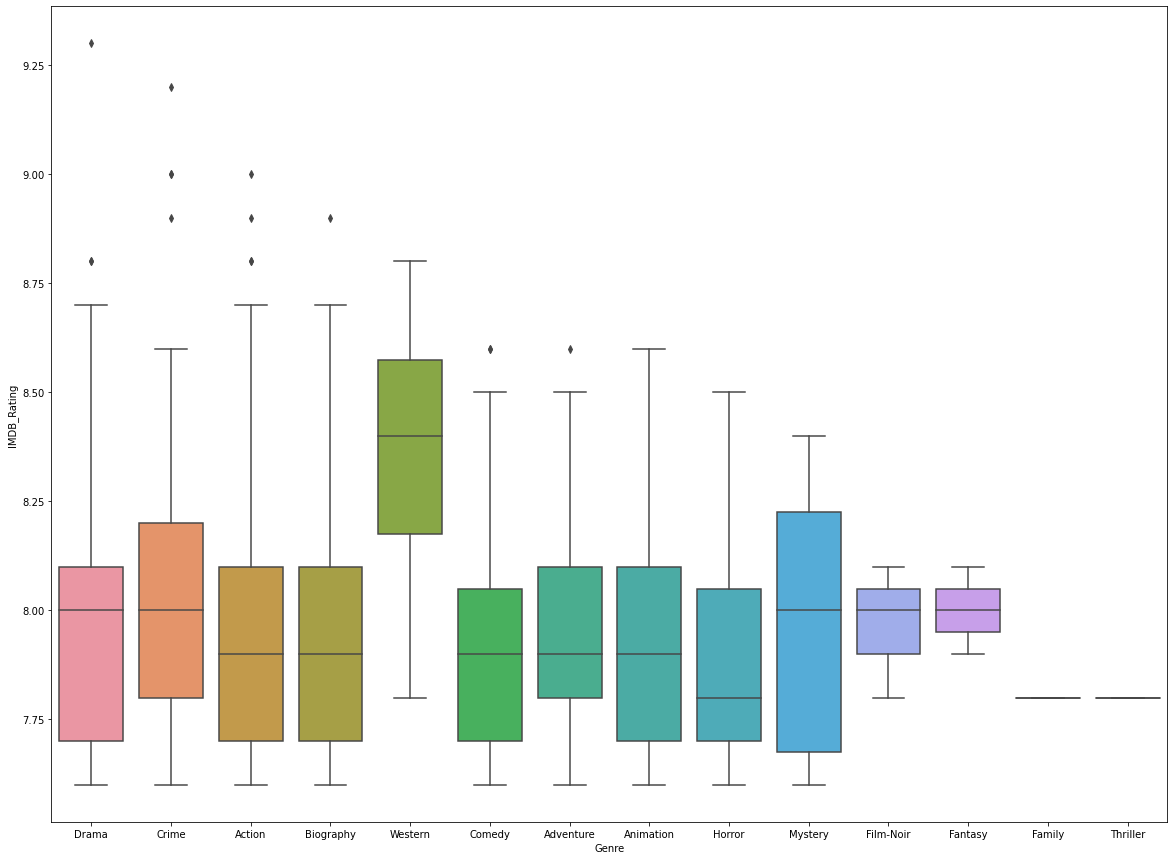

In [8]:
plt.figure(figsize=(20,15))
sns.boxplot(x='Genre', y = 'IMDB_Rating', data =  df)

<p> Como podemos observar si que existe un cierto orden dentro de la categoría de géneros, de modo que vamos a realizar un encoding usando un map con un diccionario agrupando los géneros que tengan una mediana similar. De esta forma la columna Genre pasa a ser de categórica a numérica. </p>

In [16]:
genre = {'Western' : 1, 'Drama' : 2 , 'Crime' : 2, 'Mystery':2,'Film-Noir':2,'Fantasy' : 2, 'Action' :3 ,'Biography' :3 , 'Comedy': 3, 'Adventure': 3,'Animation' : 3,
          'Horror': 4, 'Family':4, 'Thriller': 4}
#Debemos cambiar el orden de la codificación de géneros

<p> USando el diccionario definido hemos realizado un mapeo para crear una nueva columna con los valores numéricos. </p>

In [17]:
df['Genre_map'] = df['Genre'].map(genre)

In [20]:
df.sample(5)

,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,No_of_Votes,Gross,Rating_BOX,Ryr_Sklstd,Rnt_Sklstd,Meta_Sklstd,Votes_Sklstd,Gross_Sklstd,Certificate_le,Genre_map
611,2009.0,R,152,Crime,7.8,76.000000,208994.0,10095170.0,0.100485,0.303030,0.970588,-0.287426,0.221085,-0.187858,8,2
405,1988.0,UA,124,Animation,8.0,80.380615,164918.0,553171.0,0.100485,-0.333333,0.147059,0.025475,0.082758,-0.354830,14,3
932,2004.0,UA,103,Horror,7.6,46.000000,379020.0,56000369.0,0.100485,0.151515,-0.470588,-2.430283,0.754693,0.615424,14,4
788,2001.0,PG-13,132,Drama,7.7,28.000000,142863.0,40311852.0,0.100485,0.060606,0.382353,-3.715997,0.013541,0.340895,6,2
71,1984.0,A,229,Crime,8.4,86.395256,311365.0,5321508.0,0.100485,-0.454545,3.235294,0.455092,0.542365,-0.271391,1,2


In [21]:
df.isna().sum()

Released_Year     0
Certificate       0
Runtime           0
Genre             0
IMDB_Rating       0
Meta_score        0
No_of_Votes       0
Gross             0
Rating_BOX        0
Ryr_Sklstd        0
Rnt_Sklstd        0
Meta_Sklstd       0
Votes_Sklstd      0
Gross_Sklstd      0
Certificate_le    0
Genre_map         0
dtype: int64

In [22]:
df.to_pickle("datos/peliculas_limpio.pkl")